In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "target": y_pred})
# submission.to_csv('submission.csv',index=False)

/kaggle/input/System-Threat-Forecaster/sample_submission.csv
/kaggle/input/System-Threat-Forecaster/train.csv
/kaggle/input/System-Threat-Forecaster/test.csv


# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,recall_score,precision_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer,MultiLabelBinarizer,OrdinalEncoder,LabelEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from xgboost import XGBClassifier
from scipy.stats import randint,loguniform
from sklearn.naive_bayes import GaussianNB,CategoricalNB

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X = df.drop("target", axis=1)  #load the data and then seperate the data and the target
y = df['target']
y.isna().sum()
X.shape

(100000, 75)

In [ ]:
y.shape

(100000,)

In [ ]:
df.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [ ]:
df.isna().sum()

MachineID             0
ProductName           0
EngineVersion         0
AppVersion            0
SignatureVersion      0
                   ... 
IsGamer             559
RegionIdentifier    559
DateAS                0
DateOS               24
target                0
Length: 76, dtype: int64

In [ ]:
df.dtypes

MachineID            object
ProductName          object
EngineVersion        object
AppVersion           object
SignatureVersion     object
                     ...   
IsGamer             float64
RegionIdentifier    float64
DateAS               object
DateOS               object
target                int64
Length: 76, dtype: object

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns # column names with type object
num_cols = X.select_dtypes(include=['int64', 'float64']).columns # column names with type names
print(obj_cols)
print(num_cols)

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'PlatformType', 'Processor', 'OSVersion',
       'OsPlatformSubRelease', 'OSBuildLab', 'SKUEditionName',
       'MDC2FormFactor', 'DeviceFamily', 'PrimaryDiskType', 'ChassisType',
       'PowerPlatformRole', 'NumericOSVersion', 'OSArchitecture', 'OSBranch',
       'OSEdition', 'OSSkuFriendlyName', 'OSInstallType',
       'AutoUpdateOptionsName', 'OSGenuineState', 'LicenseActivationChannel',
       'FlightRing', 'DateAS', 'DateOS'],
      dtype='object')
Index(['IsBetaUser', 'RealTimeProtectionState', 'IsPassiveModeEnabled',
       'AntivirusConfigID', 'NumAntivirusProductsInstalled',
       'NumAntivirusProductsEnabled', 'HasTpm', 'CountryID', 'CityID',
       'GeoRegionID', 'LocaleEnglishNameID', 'OSBuildNumber', 'OSProductSuite',
       'IsSystemProtected', 'AutoSampleSubmissionEnabled', 'SMode',
       'IEVersionID', 'FirewallEnabled', 'EnableLUA', 'OEMNameID',
       'OEMModelID', 'Processo

In [ ]:
for i in obj_cols:
    print(i,X[i].unique()) #used to verify that the do columns contain the unknownvalues,NaN, etc.

MachineID ['f541bae429089117c4aac39c90dd3416' 'dc2b14d9ce3a0ce4050bb640190f2ca5'
 'fd20c5f010e9c5f91ad1c6b3e0da68a0' ... 'd6852dfff534e03d5ddfd3c7875ab072'
 '70a8dc682128c9ff78a3de5aea9dac74' 'ad9c385b53f2ca788933a39603b84eda']
ProductName ['win8defender' 'mse']
EngineVersion ['1.1.15200.1' '1.1.15100.1' '1.1.15000.2' '1.1.14800.3' '1.1.14901.4'
 '1.1.15300.6' '1.1.14700.5' '1.1.13504.0' '1.1.14104.0' '1.1.14306.0'
 '1.1.15300.5' '1.1.14600.4' '1.1.13701.0' '1.1.15000.1' '1.1.13202.0'
 '1.1.13303.0' '1.1.14500.5' '1.1.13601.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.14003.0' '1.1.14202.0' '1.1.14405.2' '1.1.13000.0' '1.1.13804.0'
 '1.1.14500.2' '1.1.14800.1' '1.1.14305.0' '1.1.14901.3' '1.1.13103.0'
 '1.1.13903.0' '1.1.12805.0' '1.1.14700.4' '1.1.12902.0' '1.1.14700.3'
 '1.1.13802.0' '1.1.13803.0']
AppVersion ['4.18.1807.18075' '4.12.17007.18011' '4.13.17134.228' '4.14.17639.18041'
 '4.18.1806.18062' '4.12.16299.15' '4.14.17613.18039' '4.9.10586.0'
 '4.10.209.0' '4.16.17656.18052' '4.12.1700

In [ ]:
for i in X[num_cols]:
    print(i,len(X[i].unique())) # check how many unique values are present in the respective feature columns

IsBetaUser 1
RealTimeProtectionState 7
IsPassiveModeEnabled 2
AntivirusConfigID 1977
NumAntivirusProductsInstalled 6
NumAntivirusProductsEnabled 6
HasTpm 2
CountryID 220
CityID 16048
GeoRegionID 239
LocaleEnglishNameID 185
OSBuildNumber 24
OSProductSuite 7
IsSystemProtected 3
AutoSampleSubmissionEnabled 1
SMode 3
IEVersionID 103
FirewallEnabled 3
EnableLUA 4
OEMNameID 838
OEMModelID 15953
ProcessorCoreCount 20
ProcessorManufacturerID 5
ProcessorModelID 1660
PrimaryDiskCapacityMB 399
SystemVolumeCapacityMB 46189
HasOpticalDiskDrive 2
TotalPhysicalRAMMB 128
PrimaryDisplayDiagonalInches 363
PrimaryDisplayResolutionHorizontal 122
PrimaryDisplayResolutionVertical 132
InternalBatteryNumberOfCharges 1761
OSBuildNumberOnly 23
OSBuildRevisionOnly 199
OSInstallLanguageID 40
OSUILocaleID 64
IsPortableOS 2
IsFlightsDisabled 2
FirmwareManufacturerID 170
FirmwareVersionID 12300
IsSecureBootEnabled 2
IsVirtualDevice 3
IsTouchEnabled 2
IsPenCapable 2
IsAlwaysOnAlwaysConnectedCapable 3
IsGamer 3
Region

In [ ]:
for i in X[obj_cols]:
    print(i,len(X[i].unique()))

MachineID 99835
ProductName 2
EngineVersion 37
AppVersion 69
SignatureVersion 2735
PlatformType 4
Processor 3
OSVersion 7
OsPlatformSubRelease 9
OSBuildLab 281
SKUEditionName 8
MDC2FormFactor 11
DeviceFamily 2
PrimaryDiskType 5
ChassisType 29
PowerPlatformRole 9
NumericOSVersion 221
OSArchitecture 3
OSBranch 13
OSEdition 20
OSSkuFriendlyName 18
OSInstallType 9
AutoUpdateOptionsName 6
OSGenuineState 4
LicenseActivationChannel 6
FlightRing 7
DateAS 2695
DateOS 113


In [ ]:
# dropped because the features contains only one value which is not useful for training
X = X.drop(columns=["IsBetaUser", "AutoSampleSubmissionEnabled"])

In [ ]:
# re-defining the numeric columns present in the training data 'X'
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
X[num_cols] = SimpleImputer(strategy = 'mean').fit_transform(X[num_cols])
X[num_cols].isna().sum()

RealTimeProtectionState               0
IsPassiveModeEnabled                  0
AntivirusConfigID                     0
NumAntivirusProductsInstalled         0
NumAntivirusProductsEnabled           0
HasTpm                                0
CountryID                             0
CityID                                0
GeoRegionID                           0
LocaleEnglishNameID                   0
OSBuildNumber                         0
OSProductSuite                        0
IsSystemProtected                     0
SMode                                 0
IEVersionID                           0
FirewallEnabled                       0
EnableLUA                             0
OEMNameID                             0
OEMModelID                            0
ProcessorCoreCount                    0
ProcessorManufacturerID               0
ProcessorModelID                      0
PrimaryDiskCapacityMB                 0
SystemVolumeCapacityMB                0
HasOpticalDiskDrive                   0


In [ ]:
X.describe()

,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.848430,0.017620,47975.710440,1.326528,1.018264,0.996780,108.078790,81029.938587,169.741630,122.695100,...,0.0,401.987613,32942.648044,0.495690,0.003841,0.128470,0.040580,0.058398,0.296668,7.875866
std,1.014831,0.131566,13798.075222,0.520484,0.155232,0.056654,63.062151,48791.326700,89.188929,69.242252,...,0.0,220.902416,21116.617137,0.499984,0.061849,0.334614,0.197316,0.234339,0.455513,4.549763
min,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,...,0.0,2.000000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,0.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36825.000000,89.000000,74.000000,...,0.0,142.000000,13154.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7.000000,0.000000,53447.000000,1.000000,1.000000,1.000000,97.000000,82373.000000,181.000000,88.000000,...,0.0,500.000000,33066.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,7.000000,0.000000,53447.000000,2.000000,1.000000,1.000000,162.000000,122547.000000,267.000000,182.000000,...,0.0,556.000000,52319.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000
max,8.000000,1.000000,70490.000000,5.000000,4.000000,1.000000,222.000000,167957.000000,296.000000,283.000000,...,0.0,1083.000000,72091.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000


In [ ]:
X[num_cols].corr()

,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,NumAntivirusProductsEnabled,HasTpm,CountryID,CityID,GeoRegionID,LocaleEnglishNameID,...,IsFlightsDisabled,FirmwareManufacturerID,FirmwareVersionID,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier
RealTimeProtectionState,1.000000,-0.901170,0.107795,-0.184242,-0.001297,-0.001026,0.010739,-0.001666,0.013599,0.002850,...,NaN,0.010088,0.008403,-0.015118,0.007044,0.009184,0.003634,0.019855,-0.022948,-0.009456
IsPassiveModeEnabled,-0.901170,1.000000,-0.111384,0.195343,0.023414,0.004929,-0.010327,-0.001964,-0.013213,-0.006799,...,NaN,-0.009327,-0.008966,0.017269,-0.007088,-0.005307,-0.000579,-0.016452,0.025804,0.007948
AntivirusConfigID,0.107795,-0.111384,1.000000,-0.647222,-0.115021,0.058585,0.008454,-0.000664,0.017470,-0.077068,...,NaN,-0.009608,-0.020774,-0.044234,0.022732,0.034499,0.033614,0.060247,-0.026357,-0.008284
NumAntivirusProductsInstalled,-0.184242,0.195343,-0.647222,1.000000,0.273791,0.010125,-0.017950,0.003501,-0.042778,0.041460,...,NaN,0.054146,0.047153,0.210229,-0.034432,-0.011098,-0.029803,-0.075024,0.008605,0.028786
NumAntivirusProductsEnabled,-0.001297,0.023414,-0.115021,0.273791,1.000000,-0.020748,-0.014790,0.006428,-0.022385,-0.015623,...,NaN,0.015425,0.003150,0.037005,-0.009127,0.000088,-0.005243,-0.018276,-0.009543,0.000935
HasTpm,-0.001026,0.004929,0.058585,0.010125,-0.020748,1.000000,0.007648,-0.005894,0.005161,0.000168,...,NaN,-0.004294,-0.001456,0.035167,0.000676,0.011799,0.009900,0.013191,0.027917,-0.003893
CountryID,0.010739,-0.010327,0.008454,-0.017950,-0.014790,0.007648,1.000000,-0.000622,0.597061,0.040761,...,NaN,-0.018752,0.021843,-0.013022,-0.005375,0.004135,-0.008432,-0.008676,0.017259,-0.117200
CityID,-0.001666,-0.001964,-0.000664,0.003501,0.006428,-0.005894,-0.000622,1.000000,-0.060736,0.026191,...,NaN,-0.025583,0.019837,0.009979,-0.001430,-0.015480,-0.000906,-0.003973,0.004691,-0.052504
GeoRegionID,0.013599,-0.013213,0.017470,-0.042778,-0.022385,0.005161,0.597061,-0.060736,1.000000,-0.036492,...,NaN,-0.003132,0.004441,-0.067412,0.010702,0.023614,-0.002761,-0.009475,-0.002643,-0.022092
LocaleEnglishNameID,0.002850,-0.006799,-0.077068,0.041460,-0.015623,0.000168,0.040761,0.026191,-0.036492,1.000000,...,NaN,0.014064,0.019998,0.023168,-0.019460,-0.056046,-0.061525,-0.032038,-0.003186,0.168612


<Axes: >

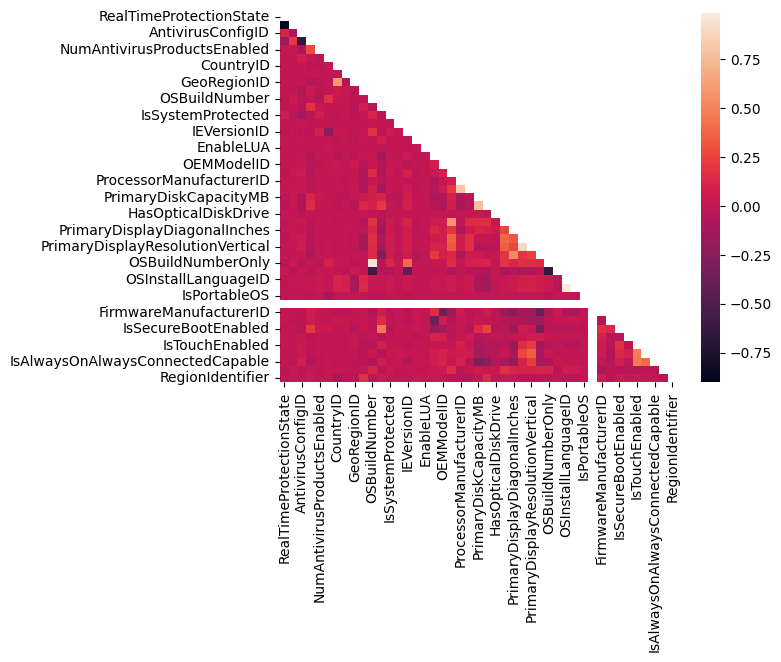

In [ ]:
corr_mat = X[num_cols].corr()
mask = np.triu(corr_mat)
sns.heatmap(corr_mat,mask=mask)

# Milestone 1

In [ ]:
print(len(X['OSVersion'].unique()))

7


In [ ]:
print(X['NumAntivirusProductsInstalled'].sort_values(ascending=False))

53879    5.0
68677    5.0
29052    5.0
78317    5.0
27187    5.0
        ... 
39161    1.0
39160    1.0
39159    1.0
39158    1.0
50000    1.0
Name: NumAntivirusProductsInstalled, Length: 100000, dtype: float64


In [ ]:
print(X[X['IsPassiveModeEnabled'] == 1]['RealTimeProtectionState'].value_counts())

RealTimeProtectionState
0.00000    1751
3.00000       9
1.00000       1
6.84843       1
Name: count, dtype: int64


In [ ]:
print(X['PrimaryDisplayResolutionHorizontal'].dtype)

float64


In [ ]:
print(len(X['PrimaryDisplayResolutionVertical'] == 768.0))

100000


In [ ]:
print(len(X[(X['PrimaryDisplayResolutionHorizontal'] == 1366.0) & (X['PrimaryDisplayResolutionVertical'] == 768.0)]))

51435


In [ ]:
print(X['TotalPhysicalRAMMB'].quantile(0.5))

4096.0


In [ ]:
y.value_counts()

target
1    50525
0    49475
Name: count, dtype: int64

## Milestone 2

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X = df.drop("target", axis=1)
y = df['target']

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
one = OrdinalEncoder()
X[obj_cols] = one.fit_transform(X[obj_cols])

In [ ]:
X[num_cols] = X[num_cols].fillna(X[num_cols].mean())

In [ ]:
X['IsBetaUser'].value_counts() #it can be discarded as it has only one value

IsBetaUser
0    100000
Name: count, dtype: int64

In [ ]:
X['IsPassiveModeEnabled'].value_counts()

IsPassiveModeEnabled
0    98238
1     1762
Name: count, dtype: int64

In [ ]:
X['AntivirusConfigID'].value_counts() #it can be discarded as it has only one value

AntivirusConfigID
53447.0    66639
7945.0      5437
47238.0     3986
62773.0     2562
46413.0     1371
           ...  
16190.0        1
32512.0        1
59215.0        1
47371.0        1
32922.0        1
Name: count, Length: 1977, dtype: int64

In [ ]:
X['AutoSampleSubmissionEnabled'].value_counts()

AutoSampleSubmissionEnabled
0    100000
Name: count, dtype: int64

In [ ]:
X['IsFlightsDisabled'].value_counts()

IsFlightsDisabled
0.0    100000
Name: count, dtype: int64

In [ ]:
X['DateAS'].corr(X['SignatureVersion'])

0.8744954962482

In [ ]:
X['OSBuildLab'].corr(X['NumericOSVersion'])

0.7866003995702381

In [ ]:
X['OSEdition'].corr(X['OSSkuFriendlyName'])

0.9988555226834495

In [ ]:
X['OSProductSuite'].corr(X['OSSkuFriendlyName'])

-0.960103960087732

In [ ]:
one = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X = df.drop("target", axis=1)
y = df['target']

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns
objn = []
for i in obj_cols:
  if len(df[i].unique()) == 10:
    objn.append(i)
cat_df = one.fit_transform(df[objn])
cat_df.shape

(100000, 0)

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X = df.drop("target", axis=1)
y = df['target']

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
mini = MinMaxScaler()
new_df = mini.fit_transform(df[num_cols])
new_df = pd.DataFrame(new_df,columns=num_cols)
summ = 0
for i in new_df.columns:
  summ += new_df[i].sum()
summ

1534590.729433082

## Milestone 3

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
X = df.drop("target", axis=1)
y = df['target']

In [ ]:
real_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

## The columns names are fetched depending on the type of values they have

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

## Impute the categorical columns with missing values with their repsective mode or most frequent values

## Impute the numeric columns with missing values with the mean of the repsective columns

In [ ]:
X[obj_cols]= SimpleImputer(strategy = "most_frequent").fit_transform(X[obj_cols])
real_test[obj_cols]= SimpleImputer(strategy = "most_frequent").fit_transform(real_test[obj_cols])

X[num_cols]= SimpleImputer(strategy = "mean").fit_transform(X[num_cols])
real_test[num_cols]= SimpleImputer(strategy = "mean").fit_transform(real_test[num_cols])

X[num_cols] = StandardScaler().fit_transform(X[num_cols])
real_test[num_cols] = StandardScaler().fit_transform(real_test[num_cols])

lb = LabelEncoder()

for i in obj_cols:
    X[i] = lb.fit_transform(X[i])
    real_test[i] = lb.fit_transform(real_test[i])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
param_grid ={
    "max_depth": [10,20],
"min_samples_split": [2, 3,4,5],
"min_samples_leaf": [1, 2],
}
dtree = DecisionTreeClassifier(random_state= 42)

In [ ]:
gre = GridSearchCV(dtree,
                   param_grid=param_grid,
                   cv=3,
                   scoring='accuracy')
gre.fit(X_train,y_train)

In [ ]:
y_pred = gre.predict(X_test)

In [ ]:
gre.best_params_

In [ ]:
gre.best_estimator_

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
y_pred = gre.predict(real_test)

In [ ]:
ada = AdaBoostClassifier(dtree, random_state=42)

In [ ]:
param_grid = {"n_estimators": [10, 20, 30],
"learning_rate": [5, 10],
"algorithm": ['SAMME']
}

In [ ]:
gre = GridSearchCV(ada,
                   param_grid=param_grid,
                   cv=3,
                   scoring='accuracy')
gre.fit(X_train,y_train)
y_pred = gre.predict(X_test)

In [ ]:
gre.best_params_

In [ ]:
accuracy_score(y_test,y_pred)

# Milestone 4

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
y = df['target']
X = df.drop('target', axis=1)

In [ ]:
real_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [ ]:
df = df.dropna(axis = 0)
y = df['target']
X = df.drop('target', axis=1)
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
ord = OrdinalEncoder()
X[obj_cols] = ord.fit_transform(X[obj_cols])

In [ ]:
X[num_cols] = StandardScaler().fit_transform(X[num_cols])

In [ ]:
pca = PCA()
pca.fit(X)

PCA()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
np.sum(pca.explained_variance_ratio_[0:40])

0.9999999914350935

In [ ]:
num_comp= np.argmax(cumulative_variance >= 0.70) + 1

In [ ]:
pc = PCA(n_components=num_comp)
new_X = pc.fit_transform(X)

In [ ]:
X_pca = pc.fit_transform(X)
X_pca.shape

(96695, 1)

In [ ]:
pc = PCA(n_components=num_comp)
new_X = pc.fit_transform(X)

In [ ]:
X_reconstructed = pc.inverse_transform(new_X)
mse = mean_squared_error(X, X_reconstructed)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
sel = SelectKBest(score_func= f_classif,k=15)
new_X = sel.fit_transform(X,y)
print(list(X.columns[sel.get_support()]))
ind = np.argmax(sel.scores_[sel.get_support()])
sel.scores_[sel.get_support()][ind]

['EngineVersion', 'RealTimeProtectionState', 'AntivirusConfigID', 'NumAntivirusProductsInstalled', 'Processor', 'IsSystemProtected', 'ProcessorCoreCount', 'PrimaryDiskCapacityMB', 'TotalPhysicalRAMMB', 'PowerPlatformRole', 'OSArchitecture', 'IsTouchEnabled', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'DateOS']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 5 25 31 62] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


2286.234765743059

In [ ]:
from sklearn.linear_model import Ridge,Lasso
rid = Ridge()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rid.fit(X_train,y_train)
y_pred= rid.predict(X_test)
print(r2_score(y_test,y_pred))
rid.coef_

0.053808843903418335


array([ 5.04777820e-08, -2.47286528e-01,  1.29799643e-02,  2.45761273e-04,
        1.10969279e-06,  0.00000000e+00,  2.53404173e-02,  1.49047638e-02,
        2.71909820e-02, -6.24521531e-02, -5.44999900e-03,  4.94969316e-03,
       -3.06630557e-03, -1.94719853e-03, -8.08729049e-04,  1.40729870e-02,
        1.76110912e-01, -1.35859277e-01, -5.86023507e-02, -3.19302018e-02,
        3.75752540e-02, -5.15353629e-03,  1.45758575e-03, -1.10138433e-02,
        2.97393605e-02,  0.00000000e+00, -8.52965349e-03, -2.07355823e-02,
        3.39949179e-03,  1.51108154e-05, -5.47933504e-03,  0.00000000e+00,
       -1.76044062e-03,  2.38272624e-03,  8.68166350e-03, -9.22195102e-04,
        3.51972420e-03,  3.29200115e-02,  2.39673521e-03, -2.73064996e-02,
        1.12073512e-02,  1.05580943e-02,  8.06150684e-04, -9.51800757e-04,
        1.92393412e-02, -1.99476709e-02, -2.93250087e-03, -1.06505965e-02,
       -1.26254622e-03,  2.85455520e-02,  1.22745644e-02,  6.64147659e-02,
        9.48731611e-03,  

In [ ]:
las = Lasso()
las.fit(X_train,y_train)
y_pred = las.predict(X_test)
print(r2_score(y_test,y_pred))
las.coef_

0.001932878943698424


array([ 3.53423658e-08,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.63835666e-05,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [ ]:
from sklearn.feature_selection import VarianceThreshold   #to remove the features with variance less than the threshold
vt = VarianceThreshold(threshold=0.2)
new_X = vt.fit_transform(X)
new_X.shape

(96695, 66)

# Milestone 5

In [ ]:
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
y = df['target']
X = df.drop('target', axis=1)
y.isna().sum()
X.shape

(100000, 75)

In [ ]:
real_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [ ]:
p_ss = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

p_ord = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value = -1))
])

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
obj_cols = X.select_dtypes(include=['object']).columns

In [ ]:
X[num_cols] = p_ss.fit_transform(X[num_cols])
X[obj_cols] = p_ord.fit_transform(X[obj_cols])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dtr = DecisionTreeClassifier(random_state=42)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
precision_score(y_test,y_pred,pos_label = 0)

In [ ]:
ada = AdaBoostClassifier( n_estimators=10, learning_rate=10, random_state=42)
ada.fit(X_train,y_train)
y_pred = ada.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
recall_score(y_test,y_pred,pos_label = 1)

In [ ]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.53525

In [ ]:
recall_score(y_test,y_pred,pos_label = 1)

0.7754396364354871

# Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier,SGDRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer,MultiLabelBinarizer,OrdinalEncoder,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from xgboost import XGBClassifier

# Considering only Numeric Columns

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
y = df['target']
X = df.drop('target', axis=1)
y.isna().sum()

0

In [ ]:
real_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [ ]:
real_test.shape

(10000, 75)

In [ ]:
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
for i in num_cols:
    print(i,len(real_test[i].unique()))

IsBetaUser 1
RealTimeProtectionState 7
IsPassiveModeEnabled 2
AntivirusConfigID 471
NumAntivirusProductsInstalled 6
NumAntivirusProductsEnabled 6
HasTpm 2
CountryID 196
CityID 3722
GeoRegionID 170
LocaleEnglishNameID 130
OSBuildNumber 20
OSProductSuite 3
IsSystemProtected 3
AutoSampleSubmissionEnabled 1
SMode 3
IEVersionID 71
FirewallEnabled 3
EnableLUA 2
OEMNameID 268
OEMModelID 3866
ProcessorCoreCount 11
ProcessorManufacturerID 4
ProcessorModelID 906
PrimaryDiskCapacityMB 140
SystemVolumeCapacityMB 6645
HasOpticalDiskDrive 2
TotalPhysicalRAMMB 32
PrimaryDisplayDiagonalInches 188
PrimaryDisplayResolutionHorizontal 50
PrimaryDisplayResolutionVertical 48
InternalBatteryNumberOfCharges 516
OSBuildNumberOnly 16
OSBuildRevisionOnly 161
OSInstallLanguageID 40
OSUILocaleID 46
IsPortableOS 2
IsFlightsDisabled 2
FirmwareManufacturerID 70
FirmwareVersionID 3452
IsSecureBootEnabled 2
IsVirtualDevice 3
IsTouchEnabled 2
IsPenCapable 2
IsAlwaysOnAlwaysConnectedCapable 3
IsGamer 3
RegionIdentifier 1

In [ ]:
X = X.drop(columns=["IsBetaUser", "AutoSampleSubmissionEnabled"])
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = SimpleImputer(strategy = 'mean').fit_transform(X[num_cols])
X[num_cols].isna().sum()

RealTimeProtectionState               0
IsPassiveModeEnabled                  0
AntivirusConfigID                     0
NumAntivirusProductsInstalled         0
NumAntivirusProductsEnabled           0
HasTpm                                0
CountryID                             0
CityID                                0
GeoRegionID                           0
LocaleEnglishNameID                   0
OSBuildNumber                         0
OSProductSuite                        0
IsSystemProtected                     0
SMode                                 0
IEVersionID                           0
FirewallEnabled                       0
EnableLUA                             0
OEMNameID                             0
OEMModelID                            0
ProcessorCoreCount                    0
ProcessorManufacturerID               0
ProcessorModelID                      0
PrimaryDiskCapacityMB                 0
SystemVolumeCapacityMB                0
HasOpticalDiskDrive                   0


In [ ]:
real_test = real_test.drop(columns = ["IsBetaUser","AutoSampleSubmissionEnabled"])

In [ ]:
X['DateOS'][0]

'2018-04-17'

In [ ]:
X[cat_cols] = X[cat_cols].replace('UNKNOWN', np.nan)
X[cat_cols] = X[cat_cols].replace('UNSPECIFIED', np.nan)

real_test[cat_cols] = real_test[cat_cols].replace('UNKNOWN', np.nan)
real_test[cat_cols] = real_test[cat_cols].replace('UNSPECIFIED', np.nan)

# X[num_cols] = SimpleImputer(strategy = 'median').fit_transform(X[num_cols])
real_test[num_cols] = SimpleImputer(strategy = 'mean').fit_transform(real_test[num_cols])

In [ ]:
X['DateOS'] = pd.to_datetime(X['DateOS'], format='%Y-%m-%d', errors = 'coerce').dt.month
X['DateAS'] = pd.to_datetime(X['DateAS'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.month

real_test['DateOS'] = pd.to_datetime(real_test['DateOS'], format='%Y-%m-%d', errors = 'coerce').dt.month
real_test['DateAS'] = pd.to_datetime(real_test['DateAS'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.month

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
num_X = StandardScaler().fit_transform(X[num_cols])
real_test[num_cols] = StandardScaler().fit_transform(real_test[num_cols])
y = y.fillna(y.mean())

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(num_X, y, test_size=0.2, random_state = 42)

In [ ]:
model_lin = LinearRegression()
model_lin.fit(X_train, y_train)
y_pred = model_lin.predict(X_test)
y_pred = model_lin.predict(real_test[num_cols])

In [ ]:
log = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
y_pred = model_log.predict(real_test[num_cols])

In [ ]:
model = SGDClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
y_pred = model.predict(real_test[num_cols])

In [ ]:
y_pred = model.predict(real_test[num_cols])
acuuracy = 0.5882

In [ ]:
parma_grid = {
    'loss': ['hinge','squared_hinge','perceptron'],
    'penalty': ['l1','l2'],
    'alpha' : [0.05,0.01,0.1]
}

In [ ]:
gre = GridSearchCV(estimator = model,
                   param_grid=parma_grid,
                   cv=3,
                   scoring='accuracy')
gre.fit(X_train,y_train)
y_pred = gre.predict(X_test)
print(accuracy_score(y_test,y_pred))

In [ ]:
y_pred = gre.predict(real_test[num_cols])

In [ ]:
submission = pd.DataFrame({"id": range(0,real_test.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y_pred = gre.predict(real_test[num_cols])
y_pred.shape

# Considering all the Columns

In [ ]:
df = pd.read_csv('/kaggle/input/System-Threat-Forecaster/train.csv')
y = df['target']
X = df.drop('target', axis=1)

In [ ]:
real_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
X[obj_cols] = X[obj_cols].replace('UNKNOWN', np.nan)
X[obj_cols] = X[obj_cols].replace('UNSPECIFIED', np.nan)

real_test[obj_cols] = real_test[obj_cols].replace('UNKNOWN', np.nan)
real_test[obj_cols] = real_test[obj_cols].replace('UNSPECIFIED', np.nan)

In [ ]:
p_ss = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
p_ord = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value = -1))
])

In [ ]:
obj_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
X['DateOS'] = pd.to_datetime(X['DateOS'], format='%Y-%m-%d', errors = 'coerce').dt.month
X['DateAS'] = pd.to_datetime(X['DateAS'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.month

real_test['DateOS'] = pd.to_datetime(real_test['DateOS'], format='%Y-%m-%d', errors = 'coerce').dt.month
real_test['DateAS'] = pd.to_datetime(real_test['DateAS'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.month

In [ ]:
X[obj_cols] = p_ord.fit_transform(X[obj_cols])
real_test[obj_cols] = p_ord.transform(real_test[obj_cols])

In [ ]:
X[num_cols] = p_ss.fit_transform(X[num_cols])
real_test[num_cols] = p_ss.transform(real_test[num_cols])

In [ ]:
simp = SimpleImputer(strategy = 'most_frequent')

In [ ]:
X[num_cols] = simp.fit_transform(X[num_cols])
real_test[num_cols] = simp.transform(real_test[num_cols])

In [ ]:
ss = StandardScaler()
X[num_cols] = ss.fit_transform(X[num_cols])
real_test[num_cols] = ss.transform(real_test[num_cols])

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
poly = PolynomialFeatures(degree=2)
new_X = poly.fit_transform(X)
new_real_test = poly.fit_transform(real_test)
lin = LinearRegression()

In [ ]:
lin.fit(X_train,y_train)
r2_score(y_test,lin.predict(X_test))

0.050083112587426704

In [ ]:
logi = LogisticRegression()
logi.fit(X_train,y_train)
y_pred = logi.predict(X_test)
accuracy_score(y_test,y_pred)

0.53585

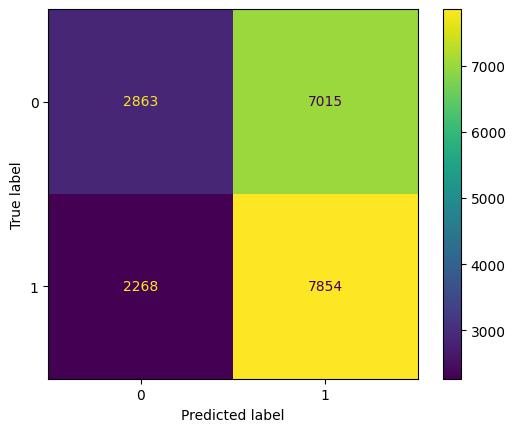

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y_pred = logi.predict(real_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gb= GaussianNB()
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.55265

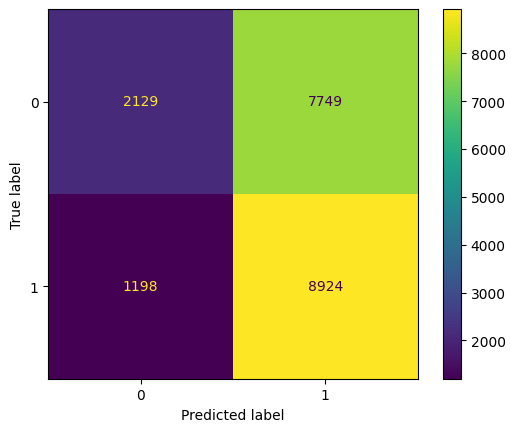

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y_pred = gb.predict(real_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X[obj_cols], y, test_size=0.2, random_state=42)

In [ ]:
ct = CategoricalNB()
ct.fit(X_train,y_train)
y_pred = ct.predict(X_test)
accuracy_score(y_test,y_pred)

0.57005

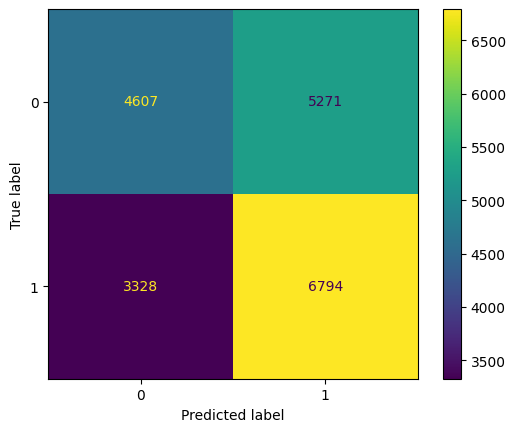

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

In [ ]:
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
param_grid = {"n_estimators": [10, 20, 30],
"max_depth" : [5,6,8],
"max_leaf_nodes" : [5,6,7],
'min_samples_split': [2, 5, 10],
'criterion' : ['gini', 'log_loss', 'entropy']
}

In [ ]:
gre = GridSearchCV(estimator = rf,
                   param_grid=param_grid,
                   cv=3,
                   scoring='accuracy',
                  n_jobs = -1)

In [ ]:
gre.fit(X_train, y_train)

In [ ]:
gre.fit(X_train,y_train)
y_pred = random_search.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y_pred = gre.predict(real_test)

In [ ]:
xg =  XGBClassifier()
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
accuracy_score(y_test,y_pred)

0.6243

In [ ]:
xg= XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500, 700],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8,1.0],
    'subsample': [0.8,1.0],
    'gamma': [0, 0.4, 0.2]
}

rd = RandomizedSearchCV(xg, param_grid,
                        cv=3, scoring='accuracy',
                        n_iter=10, n_jobs=-1)

rd.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.4, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700],
                                        'subsample': [0.8, 1.0]},
                   scoring='accuracy')

In [ ]:
y_pred = rd.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
rd.fit(X,y)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'gamma': [0, 0.4, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700],
                                        'subsample': [0.8, 1.0]},
                   scoring='accuracy')

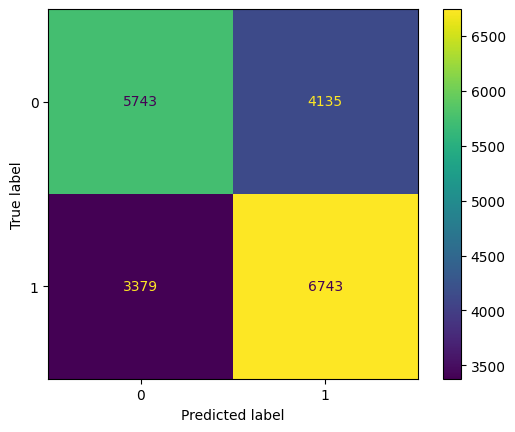

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
import lightgbm as lgb
mod = lgb.LGBMClassifier()

In [ ]:
mod.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 40403, number of negative: 39597
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4709
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505038 -> initscore=0.020151
[LightGBM] [Info] Start training from score 0.020151


LGBMClassifier()

In [ ]:
y_pred = mod.predict(X_test)
accuracy_score(y_test,y_pred)

0.6281

In [ ]:
mod.fit(X,y)

[LightGBM] [Info] Number of positive: 50525, number of negative: 49475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4772
[LightGBM] [Info] Number of data points in the train set: 100000, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505250 -> initscore=0.021001
[LightGBM] [Info] Start training from score 0.021001


LGBMClassifier()

In [ ]:
y_pred = mod.predict(real_test)
# accuracy_score(y_test,y_pred)

In [ ]:
submission = pd.DataFrame({"id": range(0,real_test.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)

In [ ]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
y_pred = rd.predict(real_test)

In [ ]:
submission = pd.DataFrame({"id": range(0,real_test.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)

In [ ]:
df = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
y = df['target']
Xn = df.drop('target', axis=1)
y.isna().sum()

real_test = pd.read_csv('/kaggle/input/System-Threat-Forecaster/test.csv')


In [ ]:
obj_cols = Xn.select_dtypes(include=['object']).columns
num_cols = Xn.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
Xn[obj_cols] = Xn[obj_cols].replace('UNKNOWN', np.nan)
Xn[obj_cols] = Xn[obj_cols].replace('UNSPECIFIED', np.nan)

real_test[obj_cols] = real_test[obj_cols].replace('UNKNOWN', np.nan)
real_test[obj_cols] = real_test[obj_cols].replace('UNSPECIFIED', np.nan)

In [ ]:
Xn['DateOS'] = pd.to_datetime(Xn['DateOS'], format='%Y-%m-%d', errors = 'coerce').dt.month
Xn['DateAS'] = pd.to_datetime(Xn['DateAS'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.month

real_test['DateOS'] = pd.to_datetime(real_test['DateOS'], format='%Y-%m-%d', errors = 'coerce').dt.month
real_test['DateAS'] = pd.to_datetime(real_test['DateAS'], format='%Y-%m-%d %H:%M:%S', errors = 'coerce').dt.month

In [ ]:
Xn[obj_cols] = p_ord.fit_transform(Xn[obj_cols])
real_test[obj_cols] = p_ord.transform(real_test[obj_cols])

In [ ]:
Xn[num_cols] = p_ss.fit_transform(Xn[num_cols])
real_test[num_cols] = p_ss.transform(real_test[num_cols])

In [ ]:
obj_cols = Xn.select_dtypes(include=['object']).columns
num_cols = Xn.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
sel = SelectKBest(score_func= f_classif,k=15)
new_X = sel.fit_transform(Xn,y)
n_real = sel.transform(real_test)

In [ ]:
cols = list(Xn.columns[sel.get_support()])
X = Xn[cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
y_pred = xg.predict(n_real)